Second, both sensors have a very similar amplitude \
and range of values. More so, the yellow marked \
parts are actually very similar. We saw in other \
sensors (see below) that the drop at mark 140000 \
is occurring in almost all sensors. Sensor 51 seems \
to also show this drop right after its data gap. \
Therefore, we decided to use the 50 to repair the 51. \
Not the cleanest way, but here definitely possible.

After dropping sensor_50 we see that now sensor_00 \
andthe sensors between 06–09 show most NaNs. Now is \
a good time to check the variance, which shows how \
much the signal derives from the mean of itself. \
Meaning, does this signal move in any way? \
If we want to detect a trend or change in class, \
it is good if the signal does show variance.

c:\Users\dimau\Anaconda3\envs\stations\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


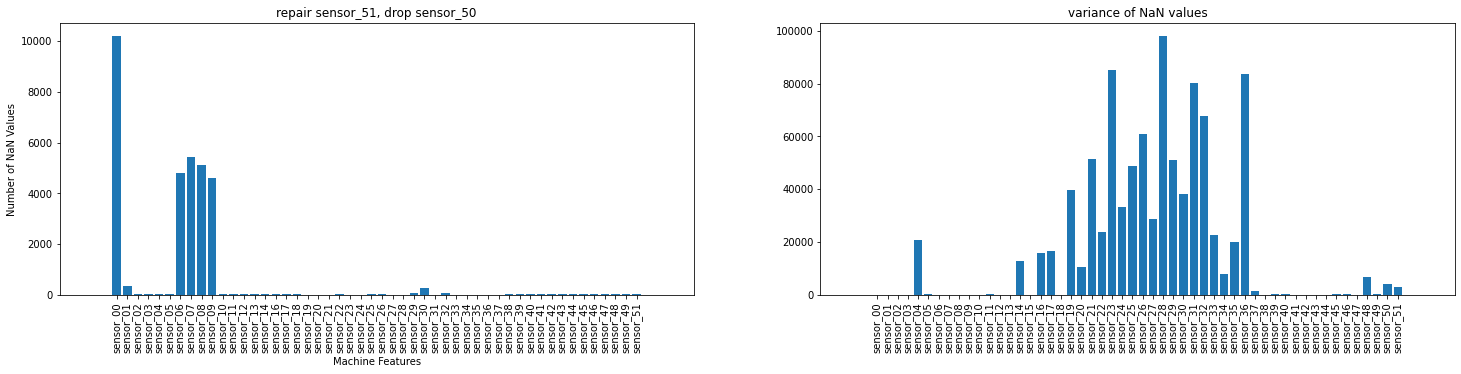

In [10]:
import pandas as pd
import sys
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt


data = data_csv = pd.read_csv('.\..\pump_data\pump_sensor.csv') # read data from csv file

data_csv['sensor_51'][110000:140000]=data_csv['sensor_50'][110000:140000] # repair sensor 51

columns_to_drop = ['timestamp', 'machine_status', 'Unnamed: 0']

# fig, axes = plt.subplots(1, 1, figsize=(25, 5))
fig, axes = plt.subplots(1, 2, figsize=(25, 5))

nan_data_sum = data_csv.drop(['sensor_15', 'sensor_50'] + columns_to_drop, axis=1).isna().sum()
axes[0].bar(nan_data_sum.index, nan_data_sum.values)
axes[0].set_xlabel('Machine Features')
axes[0].set_ylabel('Number of NaN Values')
axes[0].set_title('repair sensor_51, drop sensor_50')

axes[0].tick_params(axis='x', labelrotation=90)
axes[0].margins(x=0.1)

nan_data_var = data_csv.drop(columns_to_drop, axis=1).var()
axes[1].bar(nan_data_var.index, nan_data_var.values)
axes[1].set_title('variance of NaN values')

axes[1].tick_params(axis='x', labelrotation=90)
axes[1].margins(x=0.1)

plt.show()